# 练习三  多分类问题 和 神经网路

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm #Used to display images in a specific colormap
import scipy.io#用来加载.mat文件
import scipy.misc #将矩阵转化image
import pandas as pd
import random #To pick random images to display

### Multi-class Classification

#### 1.1Datasets

In [2]:
matdata= scipy.io.loadmat("data/ex3data1.mat")
x,y = matdata['X'] ,matdata['y']
#讲x矩阵加一列1
x = np.insert(x,0,1,axis=1)
#输出y矩阵  查看种类个数 1....10  10代表数字0
print("x的shape是：%s.  y的所有种类: %s."%(matdata['X'].shape,np.unique(y)))
print("'X' shape: %s. X[0] shape: %s"%(x.shape,x[0].shape))
#X is 5000 images. Each image is a row. Each image has 400 pixels unrolled (20x20)

x的shape是：(5000, 400).  y的所有种类: [ 1  2  3  4  5  6  7  8  9 10].
'X' shape: (5000, 401). X[0] shape: (401,)


In [3]:
def getDatumImg(row):
    """
        此函数是将一行转化成 20 * 20 的矩阵
    """
    width , height = 20 ,20
    res = row[1:].reshape((width,height))
    return res.T

def dispData( indices_to_display = None):
    """
        此函数讲x中的数据转化成图片
    """
    height ,width = 20,20
    nrows , ncols = 10 , 10
    if not indices_to_display:
        indices_to_display =random.sample(range(x.shape[0]),nrows * ncols)#挑选行的index
    bigpicture = np.zeros((height*nrows,width*ncols))

    irow , icol = 0 , 0
    for idx in indices_to_display:
        if icol == nrows:
            irow +=1
            icol = 0
        iimg = getDatumImg(x[idx])
        bigpicture[irow*height:irow*height+iimg.shape[0],width*icol:width*icol+iimg.shape[1]]=iimg
        icol+=1
    
    fig = plt.figure(figsize=(6,6))
    img = scipy.misc.toimage(bigpicture)
    plt.imshow(img,cmap=cm.Greys_r)

/home/professor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


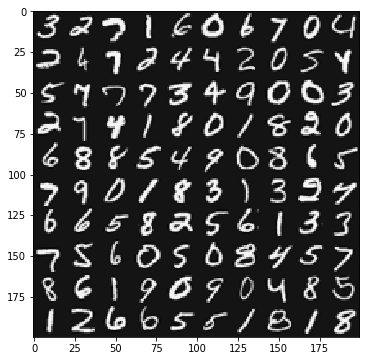

In [4]:
dispData()

### 1.3 Vectorizing Logistic Regression

![jupyter](./逻辑回归的损失函数.png)

<img src='./逻辑回归的损失函数.png'/>

In [5]:
#逻辑回归的损失函数 和假设函数
from scipy.special import expit #sigmoid function
def h(theta,x):
    return expit(np.dot(x,theta))

def computeCost(myTheta,myx,myy,mylambda = 0):
    m = myx.shape[0] #样本数量   公式中的m  shape:(5000)
    myh = h(myTheta,myx) #shape：（5000,1）
    first = np.log(myh).dot(-myy.T) #shape:(5000，5000)
    second = np.log(1.0-myh).dot(1-myy.T)#shape:(5000，5000)
    left = np.sum(first-second) / m #shape:(5000，5000)
    right = myTheta.T.dot(myTheta)*mylambda/(2*m)#shape: (1,1)'
    return left + right

    

#### 1.4 One-vs-all Classification

In [6]:
def plot_an_image(X): 
    """
    随机打印一个数字
    """ 
    pick_one = np.random.randint(0, 5000) 
    image = X[pick_one, :] 
    fig, ax = plt.subplots(figsize=(1, 1)) 
    ax.matshow(image[1:].reshape((20, 20)), cmap='gray_r') 
    plt.xticks([]) # 去除刻度，美观 
    plt.yticks([]) 
    plt.show() 
    print('this should be {}'.format(y[pick_one]))


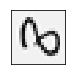

this should be [8]


In [7]:
plot_an_image(x)

### 2 Neural Network

#### 2.1model repretation

In [8]:
def load_data(datafile):
    data = scipy.io.loadmat(datafile)
    return data["Theta1"] , data["Theta2"]

In [9]:
Theta1,Theta2 = load_data("data/ex3weights.mat")
#Theta1 has shape: (25, 401)
#Theta2 has shape: (10, 26)

#### 2.2 Feedforward Propagation

In [28]:
def propagation(row,Theas):
    """
        正向传播
        Function that given a list of Thetas, propagates the
        Row of features forwards, assuming the features already
        include the bias unit in the input layer, and the 
        Thetas need the bias unit added to features between each layer
    """
    features= row
    for i in range(len(Theas)):
        theta = Theas[i]
        z = theta.dot(features)
        a = expit(z)
        if i == len(Theas)-1:
            return a
        a = np.insert(a,0,1)#这是在隐藏层加上那个 偏移值 1
        features = a
    
def predict(row,Thetas):
    classes = list(range(1,11))
    output = propagation(row,Thetas)
    return classes[np.argmax(np.array(output))]

In [66]:
def display_an_predict(X,ind): 
    """
    随机打印一个数字
    """ 
    pick_one = np.random.randint(0, 5000) 
    image = X[ind, :] 
    fig, ax = plt.subplots(figsize=(1, 1)) 
    ax.matshow(image[1:].reshape((20, 20)), cmap='gray_r') 
    plt.xticks([]) # 去除刻度，美观 
    plt.yticks([]) 
    plt.show() 
    print('this should be {}'.format(y[ind]))
    print('predict is {}'.format(predict(X[ind],[Theta1,Theta2])))


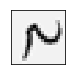

this should be [5]
predict is 5


In [30]:
display_an_predict(x)

In [50]:
#计算预测的正确率
incorrct = []
thetas = [Theta1,Theta2]
conrrct_ind = []
for i in range(x.shape[0]):
    if predict(x[i],thetas) == y[i]:
         conrrct_ind.append(i)
    else: incorrct.append(i)
print("the corrcet rate is {}%".format(len(conrrct_ind)/len(x) * 100))

the corrcet rate is 97.52%


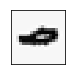

this should be [10]
predict is 8


In [71]:
display_an_predict(x,142)

/home/professor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  after removing the cwd from sys.path.


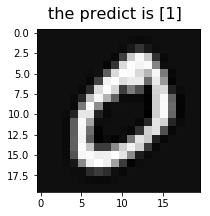

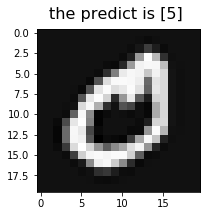

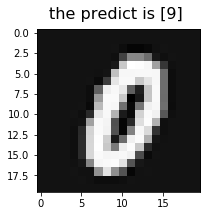

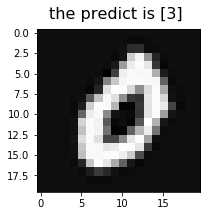

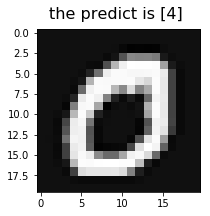

In [72]:
for i in range(5):
    inde = random.choice(incorrct)
    fig = plt.figure(figsize=(3,3))
    img = scipy.misc.toimage( getDatumImg(x[i]) )
    plt.imshow(img,cmap = cm.Greys_r)
    predict_ = predict(x[inde],[Theta1,Theta2])
    predict_ = [0 if predict_ == 10 else predict_]
    plt.suptitle("the predict is {}".format(predict_),fontsize = 16,fontweight="24")